In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm

import xroms

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
y = 2010
path = '/d1/shared/TXLA_ROMS/output_20yr_obc/%i/ocean_his_00*.nc' % y
ds = xroms.open_roms_netcdf_dataset(path).sel(ocean_time='%i-08' %y)
ds, grid = xroms.roms_dataset(ds, Vtransform=None)

msk = (ds.lon_rho>-94.5) * (ds.lon_rho<-89.5) * (ds.h>=10.) * (ds.h<=50.)
msk = msk.load()
msk[165:-1, 440:460]= False
msk[130:160, 300:350]= True
msk[76:83, 490:520]= True

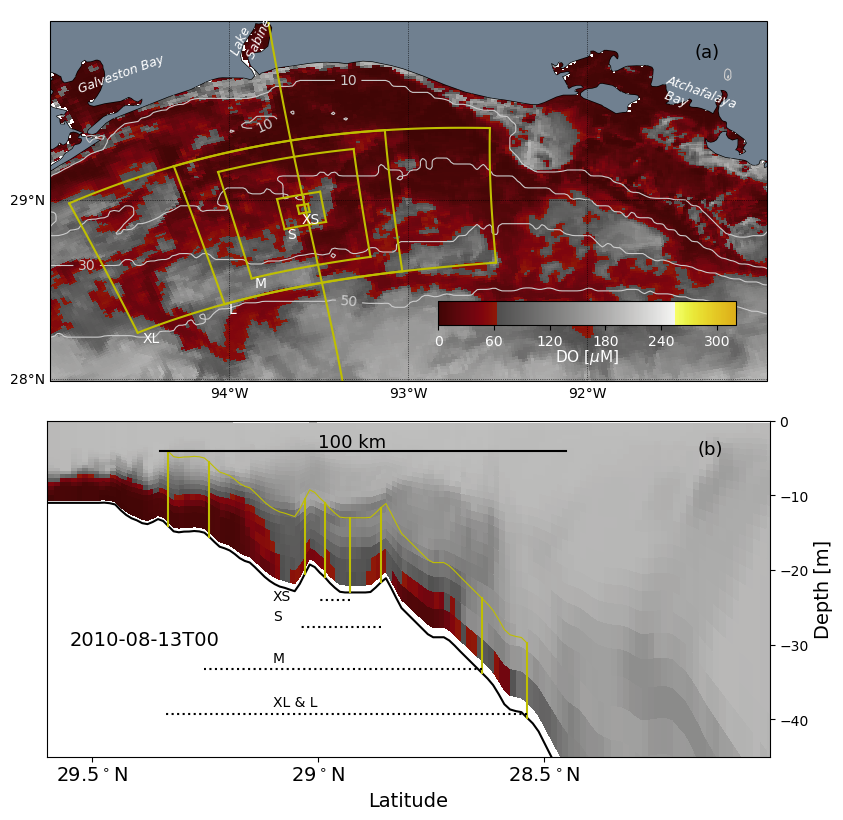

In [10]:
subset = ds.sel(ocean_time=slice('2010-08-13T00', '2010-08-16T00'))
lats = np.tile((ds.lat_rho[:,320]), (30,1))
depths = subset.z_rho.isel(xi_rho=320)

fig = plt.figure(figsize=(8.5, 8), dpi=100)

ax1 = fig.add_axes([0.06, 0.55, .85, 0.45], projection = ccrs.PlateCarree())
ax1.set_extent([-95, -91, 27.99, 30])
gl = ax1.gridlines(xlocs=np.arange(-98, -86), ylocs=[28, 29, 30], draw_labels=True,
                  linewidth=0.5, color='k', linestyle=':')
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
# gl.ylabel_style = {'rotation':'90'}

for t in [0]:
# for t in range(subset.ocean_time.shape[0]):
    ax1.coastlines(resolution='10m')
    ax1.add_feature(cfeature.NaturalEarthFeature(category='physical', name='land',
                                                scale='10m', facecolor='slategrey'))

    # ax1.set_title('Longitude', pad = -225, fontsize=10) 
    ax1.text(-94.85, 29.6, 'Galveston Bay', style='italic', fontsize=9, color='w', rotation=20)
    ax1.text(-94., 29.78, 'Lake \n Sabine', style='italic', fontsize=9, color='w', rotation=65)
    ax1.text(-91.6, 29.43, 'Atchafalaya \n Bay', style='italic', fontsize=9, color='w', rotation=-20)
    
    ax1.plot(ds.lon_rho[:,320], ds.lat_rho[:,320], 'y') # cross-section transect
    ax1.plot(ds.lon_rho[71:141,263], ds.lat_rho[71:141,263], 'y')
    ax1.plot(ds.lon_rho[71,263:376], ds.lat_rho[71,263:376], 'y')
    ax1.plot(ds.lon_rho[71:141,375], ds.lat_rho[71:141,375], 'y')
    ax1.plot(ds.lon_rho[140,263:376], ds.lat_rho[140,263:376], 'y')
    ax1.text(ds.lon_rho[66,263], ds.lat_rho[71,263]-0.05, 'XL', color='w')

    ax1.plot(ds.lon_rho[71:141,290], ds.lat_rho[71:141,290], 'y')
    ax1.plot(ds.lon_rho[71,290:346], ds.lat_rho[71,290:346], 'y')
    ax1.plot(ds.lon_rho[71:141,345], ds.lat_rho[71:141,345], 'y')
    ax1.plot(ds.lon_rho[140,290:346], ds.lat_rho[140,290:346], 'y')
    ax1.text(ds.lon_rho[66,290], ds.lat_rho[71,290]-0.05, 'L', color='w')

    ax1.plot(ds.lon_rho[79:133,300], ds.lat_rho[79:133,300], 'y')
    ax1.plot(ds.lon_rho[79,300:337], ds.lat_rho[79,300:337], 'y')
    ax1.plot(ds.lon_rho[79:133,336], ds.lat_rho[79:133,336], 'y')
    ax1.plot(ds.lon_rho[132,300:337], ds.lat_rho[132,300:337], 'y')
    ax1.text(ds.lon_rho[75,300], ds.lat_rho[79,300]-0.05, 'M', color='w')

    ax1.plot(ds.lon_rho[98:114,313], ds.lat_rho[98:114,313], 'y')
    ax1.plot(ds.lon_rho[98,313:326], ds.lat_rho[98,313:326], 'y')
    ax1.plot(ds.lon_rho[98:114,325], ds.lat_rho[98:114,325], 'y')
    ax1.plot(ds.lon_rho[113,313:326], ds.lat_rho[113,313:326], 'y')
    ax1.text(ds.lon_rho[93,313], ds.lat_rho[98,313]-0.05, 'S', color='w')

    ax1.plot(ds.lon_rho[104:109,318], ds.lat_rho[104:109,318], 'y')
    ax1.plot(ds.lon_rho[104,318:322], ds.lat_rho[104,318:322], 'y')
    ax1.plot(ds.lon_rho[104:109,321], ds.lat_rho[104:109,321], 'y')
    ax1.plot(ds.lon_rho[108,318:322], ds.lat_rho[108,318:322], 'y')
    ax1.text(ds.lon_rho[99,318], ds.lat_rho[104,318]-0.05, 'XS', color='w')

    ax1.plot(ds.lon_rho[106:108,320], ds.lat_rho[106:108,320], 'y')

    # Bottom oxygen
    mappable = ax1.pcolormesh(subset.lon_rho, subset.lat_rho, subset.dye_01.isel(ocean_time=t, s_rho=0),
                              cmap = cm.cm.oxy, vmin=0, vmax=320, zorder=1,
                              transform=ccrs.PlateCarree())

    cax = fig.add_axes([0.52, 0.62, 0.35, 0.03])
    cb = fig.colorbar(mappable, cax=cax, orientation='horizontal', ticks = np.linspace(0,280, 5))
    cb.set_label(r'DO [$\mu$M]', labelpad=-1, fontsize=11, color='w')
    cb.ax.tick_params(labelsize=10, labelcolor='w')
    cb.set_ticks(np.linspace(0,300,6))
    #bathymetry
    bathy = ax1.contour(ds.lon_rho, ds.lat_rho, ds.h, [10, 20, 30, 50], colors='0.8', linewidths=.8)
    ax1.clabel(bathy, fmt='%2.0f', fontsize=10)


    ax2 = fig.add_axes([0.06, 0.08, .85, 0.42])
    section = ax2.pcolor(ds.lat_rho[:,320], depths[t], subset.dye_01[t,:,:,320],
                        cmap = cm.cm.oxy, vmin=0, vmax=320, zorder=1)
    ax2.plot(ds.lat_rho[:,320], -ds.h[:,320], 'k', zorder=2)


    ax2.plot(ds.lat_rho[71:141,320], 10-ds.h[71:141,320], 'y', lw=.8)
    ax2.plot([ds.lat_rho[71,320], ds.lat_rho[71,320]], [-ds.h[71,320], 10-ds.h[71,320]], 'y',)
    ax2.plot([ds.lat_rho[140,320], ds.lat_rho[140, 320]], [-ds.h[140, 320], 10-ds.h[140, 320]], 'y',)

    ax2.plot([ds.lat_rho[79,320], ds.lat_rho[79,320]], [-ds.h[79,320], 10-ds.h[79,320]], 'y',)
    ax2.plot([ds.lat_rho[132,320], ds.lat_rho[132,320]], [-ds.h[132,320], 10-ds.h[132,320]], 'y',)

    ax2.plot([ds.lat_rho[98,320], ds.lat_rho[98,320]], [-ds.h[98,320], 10-ds.h[98,320]], 'y',)
    ax2.plot([ds.lat_rho[113,320], ds.lat_rho[113,320]], [-ds.h[113,320], 10-ds.h[113,320]], 'y',)

    ax2.plot([ds.lat_rho[104,320], ds.lat_rho[104,320]], [-ds.h[104,320], 10-ds.h[104,320]], 'y',)
    ax2.plot([ds.lat_rho[109,320], ds.lat_rho[109,320]], [-ds.h[109,320], 10-ds.h[109,320]], 'y',)

    ax2.text(29.55, -30, str(subset.ocean_time[t].data)[:13], fontsize=14, bbox=dict(facecolor='w', edgecolor='none'))
    ax2.set_xlim(29.6, 28)
    ax2.set_ylim(-45., 0.)
    ax2.set_yticks(-np.linspace(0,40, 5))
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position('right')
    ax2.set_ylabel('Depth [m]', fontsize=14)
    ax2.set_xticks([28.5, 29. ,29.5])
    ax2.set_xticklabels([r'$28.5^\circ$N', r'$29^\circ$N', r'$29.5^\circ$N'], fontsize=14)
    ax2.set_xlabel('Latitude', fontsize=14)

    ax2.plot([ds.lat_rho[71, 320], ds.lat_rho[141, 320]], [.5 - ds.h[71,320],.5 - ds.h[71,320]], ':k')
    ax2.text(29.1, 1.5 - ds.h[71,320], 'XL & L')

    ax2.plot([ds.lat_rho[79, 320], ds.lat_rho[133, 320]], [.5 - ds.h[79,320],.5 - ds.h[79,320]], ':k')
    ax2.text(29.1, 1.5 - ds.h[79,320], 'M')

    ax2.plot([ds.lat_rho[98, 320], ds.lat_rho[114, 320]], [-6 - ds.h[98,320],-6 - ds.h[98,320]], ':k')
    ax2.text(29.1, -5 - ds.h[98,320], 'S')

    ax2.plot([ds.lat_rho[104, 320], ds.lat_rho[110, 320]], [-1 - ds.h[104,320],-1 - ds.h[104,320]], ':k')
    ax2.text(29.1, -1 - ds.h[104,320], 'XS')

    dy = (1e5/6378137.)*(180.0/np.pi)
    ax2.plot([29.35, 29.35-dy], [-4,-4], 'k')
    ax2.text(29, -3.5, '100 km', fontsize=13)
ax1.text(.9, .9, '(a)', transform=ax1.transAxes, fontsize=13)
ax2.text(.9, .9, '(b)', transform=ax2.transAxes, fontsize=13)
fig.savefig('figures/domains.png')

In [42]:
from IPython.display import HTML
from celluloid import Camera

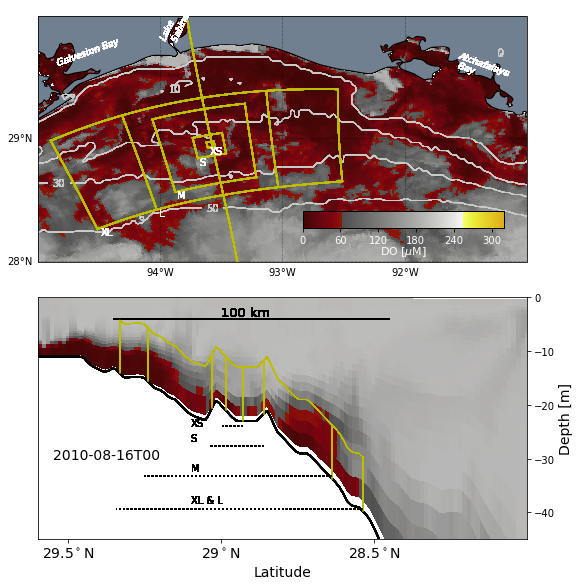

In [45]:
subset = ds.sel(ocean_time=slice('2010-08-13T00', '2010-08-16T00'))
lats = np.tile((ds.lat_rho[:,320]), (30,1))
depths = subset.z_rho.isel(xi_rho=320)

fig = plt.figure(figsize=(8, 8))
camera = Camera(fig)

ax1 = fig.add_axes([0.06, 0.55, .85, 0.45], projection = ccrs.PlateCarree())
ax1.set_extent([-95, -91, 27.99, 30])
gl = ax1.gridlines(xlocs=np.arange(-98, -86), ylocs=[28, 29, 30], draw_labels=True,
                  linewidth=0.5, color='k', linestyle=':')
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
# gl.ylabel_style = {'rotation':'90'}

for t in range(subset.ocean_time.shape[0]):
    ax1.coastlines(resolution='10m')
    ax1.add_feature(cfeature.NaturalEarthFeature(category='physical', name='land',
                                                scale='10m', facecolor='slategrey'))

    # ax1.set_title('Longitude', pad = -225, fontsize=10) 
    ax1.text(-94.85, 29.6, 'Galveston Bay', style='italic', fontsize=9, color='w', rotation=20)
    ax1.text(-94., 29.78, 'Lake \n Sabine', style='italic', fontsize=9, color='w', rotation=65)
    ax1.text(-91.6, 29.43, 'Atchafalaya \n Bay', style='italic', fontsize=9, color='w', rotation=-20)
    
    ax1.plot(ds.lon_rho[:,320], ds.lat_rho[:,320], 'y') # cross-section transect
    ax1.plot(ds.lon_rho[71:141,263], ds.lat_rho[71:141,263], 'y')
    ax1.plot(ds.lon_rho[71,263:376], ds.lat_rho[71,263:376], 'y')
    ax1.plot(ds.lon_rho[71:141,375], ds.lat_rho[71:141,375], 'y')
    ax1.plot(ds.lon_rho[140,263:376], ds.lat_rho[140,263:376], 'y')
    ax1.text(ds.lon_rho[66,263], ds.lat_rho[71,263]-0.05, 'XL', color='w')

    ax1.plot(ds.lon_rho[71:141,290], ds.lat_rho[71:141,290], 'y')
    ax1.plot(ds.lon_rho[71,290:346], ds.lat_rho[71,290:346], 'y')
    ax1.plot(ds.lon_rho[71:141,345], ds.lat_rho[71:141,345], 'y')
    ax1.plot(ds.lon_rho[140,290:346], ds.lat_rho[140,290:346], 'y')
    ax1.text(ds.lon_rho[66,290], ds.lat_rho[71,290]-0.05, 'L', color='w')

    ax1.plot(ds.lon_rho[79:133,300], ds.lat_rho[79:133,300], 'y')
    ax1.plot(ds.lon_rho[79,300:337], ds.lat_rho[79,300:337], 'y')
    ax1.plot(ds.lon_rho[79:133,336], ds.lat_rho[79:133,336], 'y')
    ax1.plot(ds.lon_rho[132,300:337], ds.lat_rho[132,300:337], 'y')
    ax1.text(ds.lon_rho[75,300], ds.lat_rho[79,300]-0.05, 'M', color='w')

    ax1.plot(ds.lon_rho[98:114,313], ds.lat_rho[98:114,313], 'y')
    ax1.plot(ds.lon_rho[98,313:326], ds.lat_rho[98,313:326], 'y')
    ax1.plot(ds.lon_rho[98:114,325], ds.lat_rho[98:114,325], 'y')
    ax1.plot(ds.lon_rho[113,313:326], ds.lat_rho[113,313:326], 'y')
    ax1.text(ds.lon_rho[93,313], ds.lat_rho[98,313]-0.05, 'S', color='w')

    ax1.plot(ds.lon_rho[104:109,318], ds.lat_rho[104:109,318], 'y')
    ax1.plot(ds.lon_rho[104,318:322], ds.lat_rho[104,318:322], 'y')
    ax1.plot(ds.lon_rho[104:109,321], ds.lat_rho[104:109,321], 'y')
    ax1.plot(ds.lon_rho[108,318:322], ds.lat_rho[108,318:322], 'y')
    ax1.text(ds.lon_rho[99,318], ds.lat_rho[104,318]-0.05, 'XS', color='w')

    ax1.plot(ds.lon_rho[106:108,320], ds.lat_rho[106:108,320], 'y')

    # Bottom oxygen
    mappable = ax1.pcolormesh(subset.lon_rho, subset.lat_rho, subset.dye_01.isel(ocean_time=t, s_rho=0),
                              cmap = cm.cm.oxy, vmin=0, vmax=320, zorder=1,
                              transform=ccrs.PlateCarree())

    cax = fig.add_axes([0.52, 0.62, 0.35, 0.03])
    cb = fig.colorbar(mappable, cax=cax, orientation='horizontal', ticks = np.linspace(0,280, 5))
    cb.set_label(r'DO [$\mu$M]', labelpad=-1, fontsize=11, color='w')
    cb.ax.tick_params(labelsize=10, labelcolor='w')
    cb.set_ticks(np.linspace(0,300,6))
    #bathymetry
    bathy = ax1.contour(ds.lon_rho, ds.lat_rho, ds.h, [10, 20, 30, 50], colors='0.8', linewidths=.8)
    ax1.clabel(bathy, fmt='%2.0f', fontsize=10)


    ax2 = fig.add_axes([0.06, 0.08, .85, 0.42])
    section = ax2.pcolor(ds.lat_rho[:,320], depths[t], subset.dye_01[t,:,:,320],
                        cmap = cm.cm.oxy, vmin=0, vmax=320, zorder=1)
    ax2.plot(ds.lat_rho[:,320], -ds.h[:,320], 'k', zorder=2)


    ax2.plot(ds.lat_rho[71:141,320], 10-ds.h[71:141,320], 'y', lw=.8)
    ax2.plot([ds.lat_rho[71,320], ds.lat_rho[71,320]], [-ds.h[71,320], 10-ds.h[71,320]], 'y',)
    ax2.plot([ds.lat_rho[140,320], ds.lat_rho[140, 320]], [-ds.h[140, 320], 10-ds.h[140, 320]], 'y',)

    ax2.plot([ds.lat_rho[79,320], ds.lat_rho[79,320]], [-ds.h[79,320], 10-ds.h[79,320]], 'y',)
    ax2.plot([ds.lat_rho[132,320], ds.lat_rho[132,320]], [-ds.h[132,320], 10-ds.h[132,320]], 'y',)

    ax2.plot([ds.lat_rho[98,320], ds.lat_rho[98,320]], [-ds.h[98,320], 10-ds.h[98,320]], 'y',)
    ax2.plot([ds.lat_rho[113,320], ds.lat_rho[113,320]], [-ds.h[113,320], 10-ds.h[113,320]], 'y',)

    ax2.plot([ds.lat_rho[104,320], ds.lat_rho[104,320]], [-ds.h[104,320], 10-ds.h[104,320]], 'y',)
    ax2.plot([ds.lat_rho[109,320], ds.lat_rho[109,320]], [-ds.h[109,320], 10-ds.h[109,320]], 'y',)

    ax2.text(29.55, -30, str(subset.ocean_time[t].data)[:13], fontsize=14, bbox=dict(facecolor='w', edgecolor='none'))
    ax2.set_xlim(29.6, 28)
    ax2.set_ylim(-45., 0.)
    ax2.set_yticks(-np.linspace(0,40, 5))
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position('right')
    ax2.set_ylabel('Depth [m]', fontsize=14)
    ax2.set_xticks([28.5, 29. ,29.5])
    ax2.set_xticklabels([r'$28.5^\circ$N', r'$29^\circ$N', r'$29.5^\circ$N'], fontsize=14)
    ax2.set_xlabel('Latitude', fontsize=14)

    ax2.plot([ds.lat_rho[71, 320], ds.lat_rho[141, 320]], [.5 - ds.h[71,320],.5 - ds.h[71,320]], ':k')
    ax2.text(29.1, 1.5 - ds.h[71,320], 'XL & L')

    ax2.plot([ds.lat_rho[79, 320], ds.lat_rho[133, 320]], [.5 - ds.h[79,320],.5 - ds.h[79,320]], ':k')
    ax2.text(29.1, 1.5 - ds.h[79,320], 'M')

    ax2.plot([ds.lat_rho[98, 320], ds.lat_rho[114, 320]], [-6 - ds.h[98,320],-6 - ds.h[98,320]], ':k')
    ax2.text(29.1, -5 - ds.h[98,320], 'S')

    ax2.plot([ds.lat_rho[104, 320], ds.lat_rho[110, 320]], [-1 - ds.h[104,320],-1 - ds.h[104,320]], ':k')
    ax2.text(29.1, -1 - ds.h[104,320], 'XS')

    dy = (1e5/6378137.)*(180.0/np.pi)
    ax2.plot([29.35, 29.35-dy], [-4,-4], 'k')
    ax2.text(29, -3.5, '100 km', fontsize=13)
    camera.snap()

In [46]:
# anim = camera.animate()
# HTML(anim.to_html5_video())
# anim.save('event.mp4')

In [3]:
# h = ds.h.where(msk, drop=True)
# rho_depths = ds.z_rho.where(msk, drop=True)
# do = ds.dye_01.where(msk, drop=True)
# ldo_thk = h + rho_depths.where(do<=60).max('s_rho')
# ldo_thk.sel(ocean_time='2010-08').to_netcdf('files/ldo_2010_08.nc')

In [ ]:
# rho = xroms.density(ds.temp, ds.salt, ds.z_rho)
# drhodz = grid.derivative(rho, 'Z', boundary='extend')
# vcrit = .01
# depth_ = ds.z_w.where(abs(drhodz)>=vcrit).isel(s_w=slice(1,-1))
# bbl = (h + depth_.where(msk, drop=True).min('s_w')).squeeze()
# bbl = bbl.where(msk, drop=True).to_netcdf('files/bbl_2010_08.nc')

In [5]:
from matplotlib.colors import LogNorm
from matplotlib.ticker import FuncFormatter

In [7]:
def to_percent(y, position):
    s =  str(y*100)
    return s + r'$\%$'

In [27]:
np.triu??

1.0


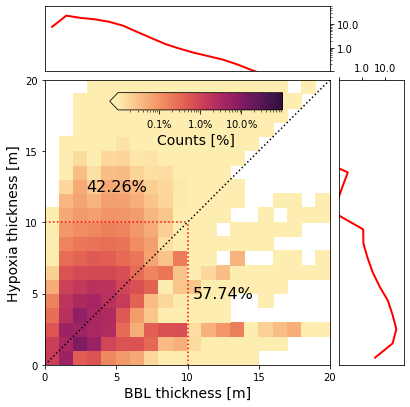

In [28]:
# definitions for the axes
left, width = 0.1, 0.66
bottom, height = 0.1, 0.66
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.15]
rect_histy = [left_h, bottom, 0.15, height]

bbl_thk = xr.open_dataarray('files/bbl_2010_08_v2.nc')
ldo_thk = xr.open_dataarray('files/ldo_2010_08.nc')

formatter = FuncFormatter(to_percent)

# start with a rectangular Figure
fig = plt.figure(1, figsize=(6, 6))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

hist = axScatter.hist2d(bbl_thk.values.flatten(),
                        ldo_thk.values.flatten(),
                        bins= np.arange(0, 20.5, 1),
                        density=True, norm=LogNorm(vmin=1e-4, vmax=1),
                        cmap=cm.cm.matter)
axScatter.plot([0,20], [0,20], ':k')
axScatter.set_xticks(np.arange(0,21, 5))
axScatter.set_yticks(np.arange(0,21, 5))
axScatter.set_ylabel('Hypoxia thickness [m]', fontsize=14)
axScatter.set_xlabel('BBL thickness [m]', fontsize=14)

under = np.tril(hist[0], 0).sum()
over1 = np.triu(hist[0], 1).sum()
over2 = np.triu(hist[0], 2).sum()
over3 = np.triu(hist[0], 3).sum()


print(under + over - diag)

axScatter.text(12.5, 5,"{0:.2%}".format(under),
               horizontalalignment='center', verticalalignment='center', fontsize=16)
axScatter.text(5, 12.5, "{0:.2%}".format(over1),
               horizontalalignment='center', verticalalignment='center', fontsize=16)

axScatter.plot([0,10], [10,10], ls=':', c='r')
axScatter.plot([10,10], [0,10], ls=':', c='r')

axHistx.plot(np.arange(.5, 20, 1), hist[0].sum(axis=0)*100, lw=2, color='r')
axHistx.set_xticks([])
axHistx.set_xlim(0,20)
axHistx.set_ylim(1e-1,60)
axHistx.set_yscale('log')
axHistx.set_yticks([1e-1, 1, 10])
axHistx.set_yticklabels(['', 1e0, 1e1])
axHistx.yaxis.tick_right()

axHisty.plot(hist[0].sum(axis=1)*100, np.arange(.5, 20, 1), lw=2, color='r')
axHisty.set_yticks([])
axHisty.set_ylim(0,20)
axHisty.set_xlim(1e-1,60)
axHisty.set_xscale('log')
axHisty.set_xticks([1e-1, 1, 10])
axHisty.set_xticklabels(['', 1e0, 1e1])
axHisty.xaxis.tick_top()

formatter = FuncFormatter(to_percent)
cax = plt.axes([.25, .69, .4, .04])
cb = fig.colorbar(hist[3], extend='min', cax=cax, orientation= 'horizontal')
cb.set_ticks([1e-3, 1e-2, 1e-1,])
cb.ax.xaxis.set_major_formatter(formatter)
cb.set_label('Counts [%]', fontsize=14)
fig.savefig('figures/thickness.png')

In [30]:
print("{0:.2%}".format(over))
print("{0:.2%}".format(over1))
print("{0:.2%}".format(over2))
print("{0:.2%}".format(over3))

58.26%
42.26%
21.98%
12.64%
